# Statistical Indocators from Anomaly Hotspot of Agricultural Production (ASAP)
## Gaul 2 data preparation
ASAP is a platform used for early warning of  upcoming weather anomaly that leads to fluctuation of agricultural production.

- General link: https://mars.jrc.ec.europa.eu/asap/
- Download link: https://mars.jrc.ec.europa.eu/asap/download.php
- Senegal country assesment: https://mars.jrc.ec.europa.eu/asap/country.php?cntry=217


In [1]:
# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
plt.style.use('dark_background')

Get data_path folder. Under subfolder region, we have statistics in gaul2 resolution for cropland during grow cycle.
As we could see in the ASAP_data_1, there is not that big difference between the cropland, cropland during grow cycle and
rangeland during grow cycle. I have chosen a cropland, because we mainly focus on cropland. Rangeland can be done in a
subsequent analysis.

In [2]:
data_folder = Path.cwd().parent.parent.joinpath('data', 'external', 'asap', 'unit', 'crop_grow_cycle')

Get CSV files downloaded from ASAP website

In [3]:
files = Path(data_folder).glob('**/*')
files = [x for x in files]

print('Number of files: ', len(files))

Number of files:  7


In [4]:
files[0].name

'country_82_var_40_set_1_class_1_sensor_4.csv'

View csv files:

In [5]:
for f in files:
    df = pd.read_csv(f)
    print('File name: \n',
          f.name, '\n',
          df.head(2), '\n',
         '***********'*7, '\n')

File name: 
 country_82_var_40_set_1_class_1_sensor_4.csv 
    country_id country_name  unit_id unit_name  variable_id   variable_name  \
0          82      Senegal       55   Kebemer           40  SPI - 3 months   
1          82      Senegal       55   Kebemer           40  SPI - 3 months   

   sensor_id   sensor_name  class_id                 class_name      date  \
0          4  ECMWF-CHIRPS         1  Crop during growing cycle  19890621   
1          4  ECMWF-CHIRPS         1  Crop during growing cycle  19890701   

   value  
0   2.48  
1   1.37   
 ***************************************************************************** 

File name: 
 country_82_var_160_set_1_class_1_sensor_5.csv 
    country_id country_name  unit_id unit_name  variable_id  \
0          82      Senegal       55   Kebemer          160   
1          82      Senegal       55   Kebemer          160   

                    variable_name  sensor_id   sensor_name  class_id  \
0  Water Satisfaction Index (WSI)     

Join all csv files into a single DataFrame

In [6]:
cols = list(df.columns)

df_asap = pd.DataFrame(columns = cols)

for f in files:
    df = pd.read_csv(f)
    df_asap = df_asap.append(df)

In [7]:
df_asap.head()

country_id country_name unit_id unit_name variable_id   variable_name  \
0         82      Senegal      55   Kebemer          40  SPI - 3 months   
1         82      Senegal      55   Kebemer          40  SPI - 3 months   
2         82      Senegal      55   Kebemer          40  SPI - 3 months   
3         82      Senegal      55   Kebemer          40  SPI - 3 months   
4         82      Senegal      55   Kebemer          40  SPI - 3 months   

  sensor_id   sensor_name class_id                 class_name      date  value  
0         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890621  2.480  
1         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890701  1.370  
2         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890711  1.723  
3         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890721  1.310  
4         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890801  0.751

In [8]:
df_asap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178143 entries, 0 to 1279
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   country_id     178143 non-null  object 
 1   country_name   178143 non-null  object 
 2   unit_id        178143 non-null  object 
 3   unit_name      178143 non-null  object 
 4   variable_id    178143 non-null  object 
 5   variable_name  178143 non-null  object 
 6   sensor_id      178143 non-null  object 
 7   sensor_name    178143 non-null  object 
 8   class_id       178143 non-null  object 
 9   class_name     178143 non-null  object 
 10  date           178143 non-null  object 
 11  value          178143 non-null  float64
dtypes: float64(1), object(11)
memory usage: 17.7+ MB


### Lets investigate what each column mean.

In [9]:
for c in cols:
    print(f'Column:            {c} \n\
has unique values: {df_asap[c].unique()} \n')

Column:            country_id 
has unique values: [82] 

Column:            country_name 
has unique values: ['Senegal'] 

Column:            unit_id 
has unique values: [55 62 63 66 76 91 186 187 249 250 561 642 656 713 1490 2959 2960 2961
 2962 2963 2982 2989 2990 2991 2992 2993 3070 3080 3085 3086 3087 3097
 3098 3273 3283 3367 3368 3369 3370 3382 3607 3949 4270] 

Column:            unit_name 
has unique values: ['Kebemer' 'Rufisque' 'Fatick' 'Mbacke' 'Saraya' 'Koungueul' 'Kolda'
 'Sedhiou' 'Mbour' 'Thies' 'Medina yoro foul' 'Foundiougne' 'Ziguinchor'
 'Podor' 'Salemata' 'Bounkiling' 'Dakar' 'Gossas' 'Goudiry' 'Koupentoum'
 'Saint louis' 'Dagana' 'Kanel' 'Linguere' 'Matam' 'Ranerou' 'Bignona'
 'Kedougou' 'Kaolack' 'Nioro du rip' 'Velingara' 'Louga' 'Oussouye'
 'Diourbel' 'Tambacounda' 'Bakel' 'Birkilane' 'Goudomp' 'Kaffrine'
 'Tivaoune' 'Maleme hodar' 'Guinguineo' 'Bambey'] 

Column:            variable_id 
has unique values: [40 160 70 2 20 140 10] 

Column:            variable_na

In [10]:
df_asap[df_asap['class_id'] == 1]['class_name'].unique()


array(['Crop during growing cycle'], dtype=object)

Here is when we store values:

In [11]:
df_asap['year'] = df_asap['date'].apply(lambda x: int(str(x)[:4]))
df_asap['month'] = df_asap['date'].apply(lambda x: int(str(x)[4:6]))
df_asap['day'] = df_asap['date'].apply(lambda x: int(str(x)[6:]))


In [12]:
df_asap['yearday'] = df_asap['date'].apply(lambda x: datetime.strftime(datetime.strptime(str(x), '%Y%m%d'), '%j'))

In [13]:
df_asap['yearday'] = df_asap['yearday'].astype(int)

<AxesSubplot:xlabel='month', ylabel='Count'>

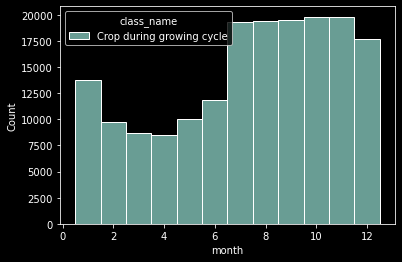

In [14]:
sns.histplot(df_asap[['year', 'month', 'class_name']], x = 'month', hue = 'class_name', discrete=True, multiple='dodge')

### Drop and save in single csv file

In [15]:
df_asap.columns

Index(['country_id', 'country_name', 'unit_id', 'unit_name', 'variable_id',
       'variable_name', 'sensor_id', 'sensor_name', 'class_id', 'class_name',
       'date', 'value', 'year', 'month', 'day', 'yearday'],
      dtype='object')

In [16]:
df_asap['unit_id'].unique()

array([55, 62, 63, 66, 76, 91, 186, 187, 249, 250, 561, 642, 656, 713,
       1490, 2959, 2960, 2961, 2962, 2963, 2982, 2989, 2990, 2991, 2992,
       2993, 3070, 3080, 3085, 3086, 3087, 3097, 3098, 3273, 3283, 3367,
       3368, 3369, 3370, 3382, 3607, 3949, 4270], dtype=object)

In [17]:
df_asap.drop(['country_id', 'country_name', 'unit_id', 'variable_id', 'sensor_id', 'class_id'], axis = 1, inplace = True)

In [18]:
df_asap.to_csv(Path(data_folder).joinpath('SEN_asap_crop_grow_cycle_unit.csv'))

### Some visualizations

In [19]:
df_asap.head()

unit_name   variable_name   sensor_name                 class_name  \
0   Kebemer  SPI - 3 months  ECMWF-CHIRPS  Crop during growing cycle   
1   Kebemer  SPI - 3 months  ECMWF-CHIRPS  Crop during growing cycle   
2   Kebemer  SPI - 3 months  ECMWF-CHIRPS  Crop during growing cycle   
3   Kebemer  SPI - 3 months  ECMWF-CHIRPS  Crop during growing cycle   
4   Kebemer  SPI - 3 months  ECMWF-CHIRPS  Crop during growing cycle   

       date  value  year  month  day  yearday  
0  19890621  2.480  1989      6   21      172  
1  19890701  1.370  1989      7    1      182  
2  19890711  1.723  1989      7   11      192  
3  19890721  1.310  1989      7   21      202  
4  19890801  0.751  1989      8    1      213

In [20]:
# df_temp = df_asap[(df_asap['variable_name'] != 'NDVI - zscore') &
#                   (df_asap['variable_name'] != 'SPI - 3 months')]
# g = sns.FacetGrid(data = df_temp,
#                   col = 'variable_name', row = 'unit_name',sharey=False,
#                   height = 5)
# g.map(sns.lineplot, 'yearday', 'value')
# df_curr = df_temp[df_temp['year'] == 2020]
# axes = g.axes.flatten()
#
# for ax in axes:
#     title = str(ax.title)
#     unit = title.split("= ")[1].split()[0]
#     var = title.split("= ")[2].split("'")[0]
#     ax.plot(df_curr.loc[(df_curr['unit_name'] == unit) &
#                              (df_curr['variable_name'] == var), 'yearday'],
#                      df_curr.loc[(df_curr['unit_name'] == unit) &
#                              (df_curr['variable_name'] == var), 'value'], color = 'r')
#     ax.legend(['average', 'last year'])

Modify days, to have better plots. Introduce a new variable: dec_day

In [21]:
# first some drops
df_asap.drop(['sensor_name', 'class_name'], axis=1, inplace=True)


In [22]:
df_asap.head(2)

unit_name   variable_name      date  value  year  month  day  yearday
0   Kebemer  SPI - 3 months  19890621   2.48  1989      6   21      172
1   Kebemer  SPI - 3 months  19890701   1.37  1989      7    1      182

In [23]:
days = df_asap['yearday'].unique()

In [24]:
days = np.array(days)

print(days)

[172 182 192 202 213 223 233 244 254 264 274 284 294 305 315 325 335 345
 355   1  11  21  32  42  52  60  70  80  61  71  81 173 183 193 203 214
 224 234 245 255 265 275 285 295 306 316 326 336 346 356  91  92 141 152
 162 142 153 163 131 132 111 121 112 122 101 102]


In [25]:
df_asap['dec_day'] = df_asap['yearday'].apply(lambda x: (x//10)*10 )


In [26]:
df_asap.head()

unit_name   variable_name      date  value  year  month  day  yearday  \
0   Kebemer  SPI - 3 months  19890621  2.480  1989      6   21      172   
1   Kebemer  SPI - 3 months  19890701  1.370  1989      7    1      182   
2   Kebemer  SPI - 3 months  19890711  1.723  1989      7   11      192   
3   Kebemer  SPI - 3 months  19890721  1.310  1989      7   21      202   
4   Kebemer  SPI - 3 months  19890801  0.751  1989      8    1      213   

   dec_day  
0      170  
1      180  
2      190  
3      200  
4      210

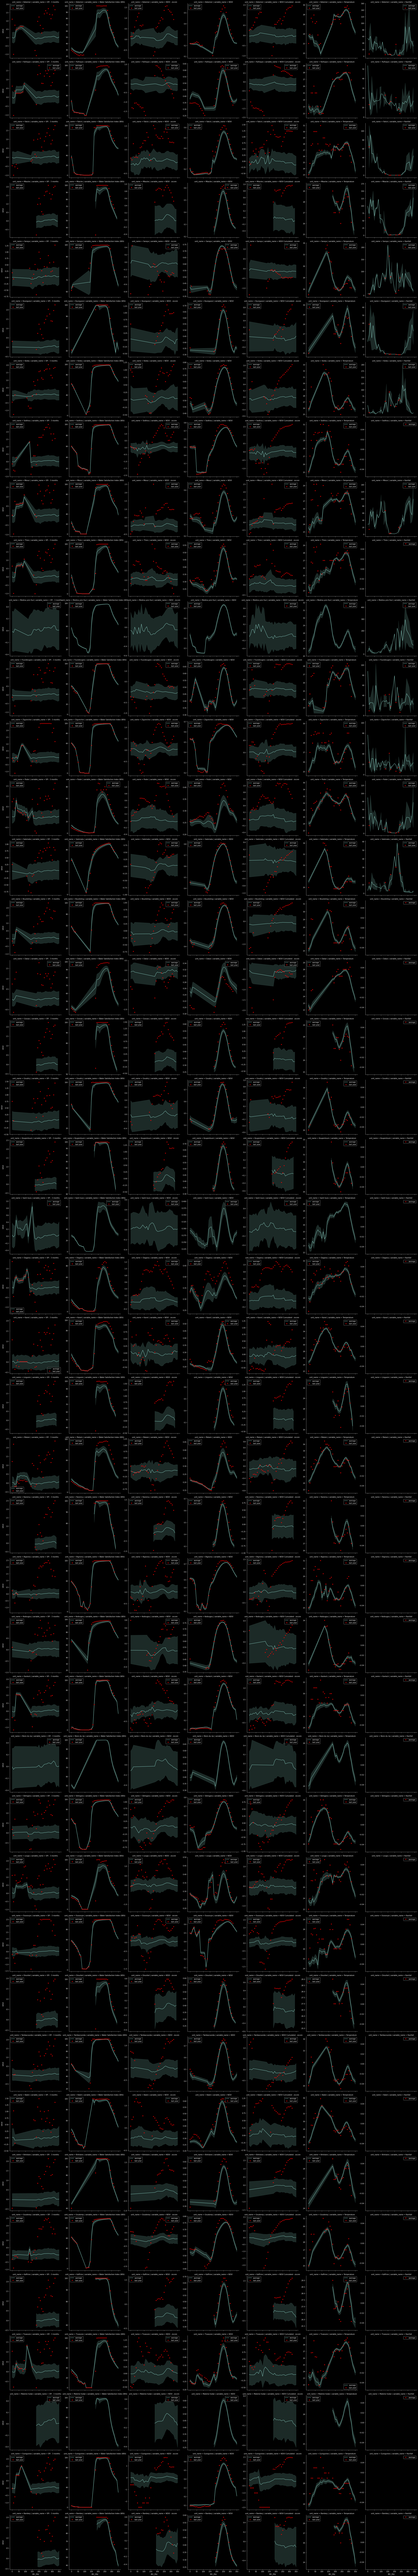

In [36]:
df_temp = df_asap
g = sns.FacetGrid(data = df_temp,
                  col = 'variable_name', row = 'unit_name',sharey=False,
                  height = 5)
g.map(sns.lineplot, 'dec_day', 'value')
df_curr = df_temp[df_temp['year'] == 2020]
axes = g.axes.flatten()

for ax in axes:
    title = str(ax.title)
    unit = title.split("= ")[1].split()[0]
    var = title.split("= ")[2].split("'")[0]
    ax.plot(df_curr.loc[(df_curr['unit_name'] == unit) &
                             (df_curr['variable_name'] == var), 'dec_day'],
                     df_curr.loc[(df_curr['unit_name'] == unit) &
                             (df_curr['variable_name'] == var), 'value'], '*', color = 'r')
    ax.legend(['average', 'last year'])

In [32]:
df_temp = df_temp[df_temp['unit_name'] == 'Velingara']

<AxesSubplot:xlabel='dec_day', ylabel='value'>

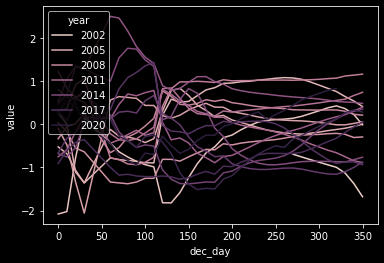

In [35]:
sns.lineplot(data = df_temp[df_temp['variable_name'] == 'NDVI Cumulated - zscore'],
             x = 'dec_day', y = 'value',
             hue = 'year')

In [33]:
df_temp['variable_name'].unique()

array(['SPI - 3 months', 'Water Satisfaction Index (WSI)',
       'NDVI - zscore', 'NDVI', 'NDVI Cumulated - zscore', 'Temperature'],
      dtype=object)

In [ ]:

years = df_asap['year'].unique()

In [42]:
days = df_asap['dec_day'].unique()

<AxesSubplot:>

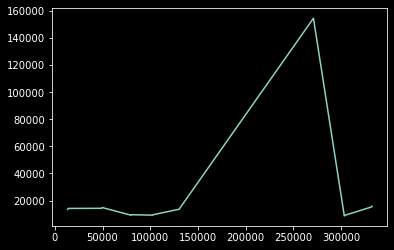

In [12]:
df_asap[df_asap['unit_name'] == 'Dakar']['Unnamed: 0'].plot()

In [10]:
df_asap.head()

country_id country_name unit_id unit_name variable_id   variable_name  \
0         82      Senegal      55   Kebemer          40  SPI - 3 months   
1         82      Senegal      55   Kebemer          40  SPI - 3 months   
2         82      Senegal      55   Kebemer          40  SPI - 3 months   
3         82      Senegal      55   Kebemer          40  SPI - 3 months   
4         82      Senegal      55   Kebemer          40  SPI - 3 months   

  sensor_id   sensor_name class_id                 class_name      date  \
0         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890621   
1         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890701   
2         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890711   
3         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890721   
4         4  ECMWF-CHIRPS        1  Crop during growing cycle  19890801   

   value  Unnamed: 0  Unnamed: 0.1  year  month  day  yearday  
0  2.480         NaN           NaN   NaN    NaN  NaN      NaN  
1  1.370         NaN           NaN   NaN    NaN  NaN      NaN  
2  1.723         NaN           NaN   NaN    NaN  NaN      NaN  
3  1.310         NaN           NaN   NaN    NaN  NaN      NaN  
4  0.751         NaN           NaN   NaN    NaN  NaN      NaN